In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.core.pylabtools import figsize
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from ipywidgets import interact, widgets,fixed
from IPython.display import Image
import scipy.stats as stats

figsize(20, 7)

Screenshot 2019-06-06 at 14.54.37.png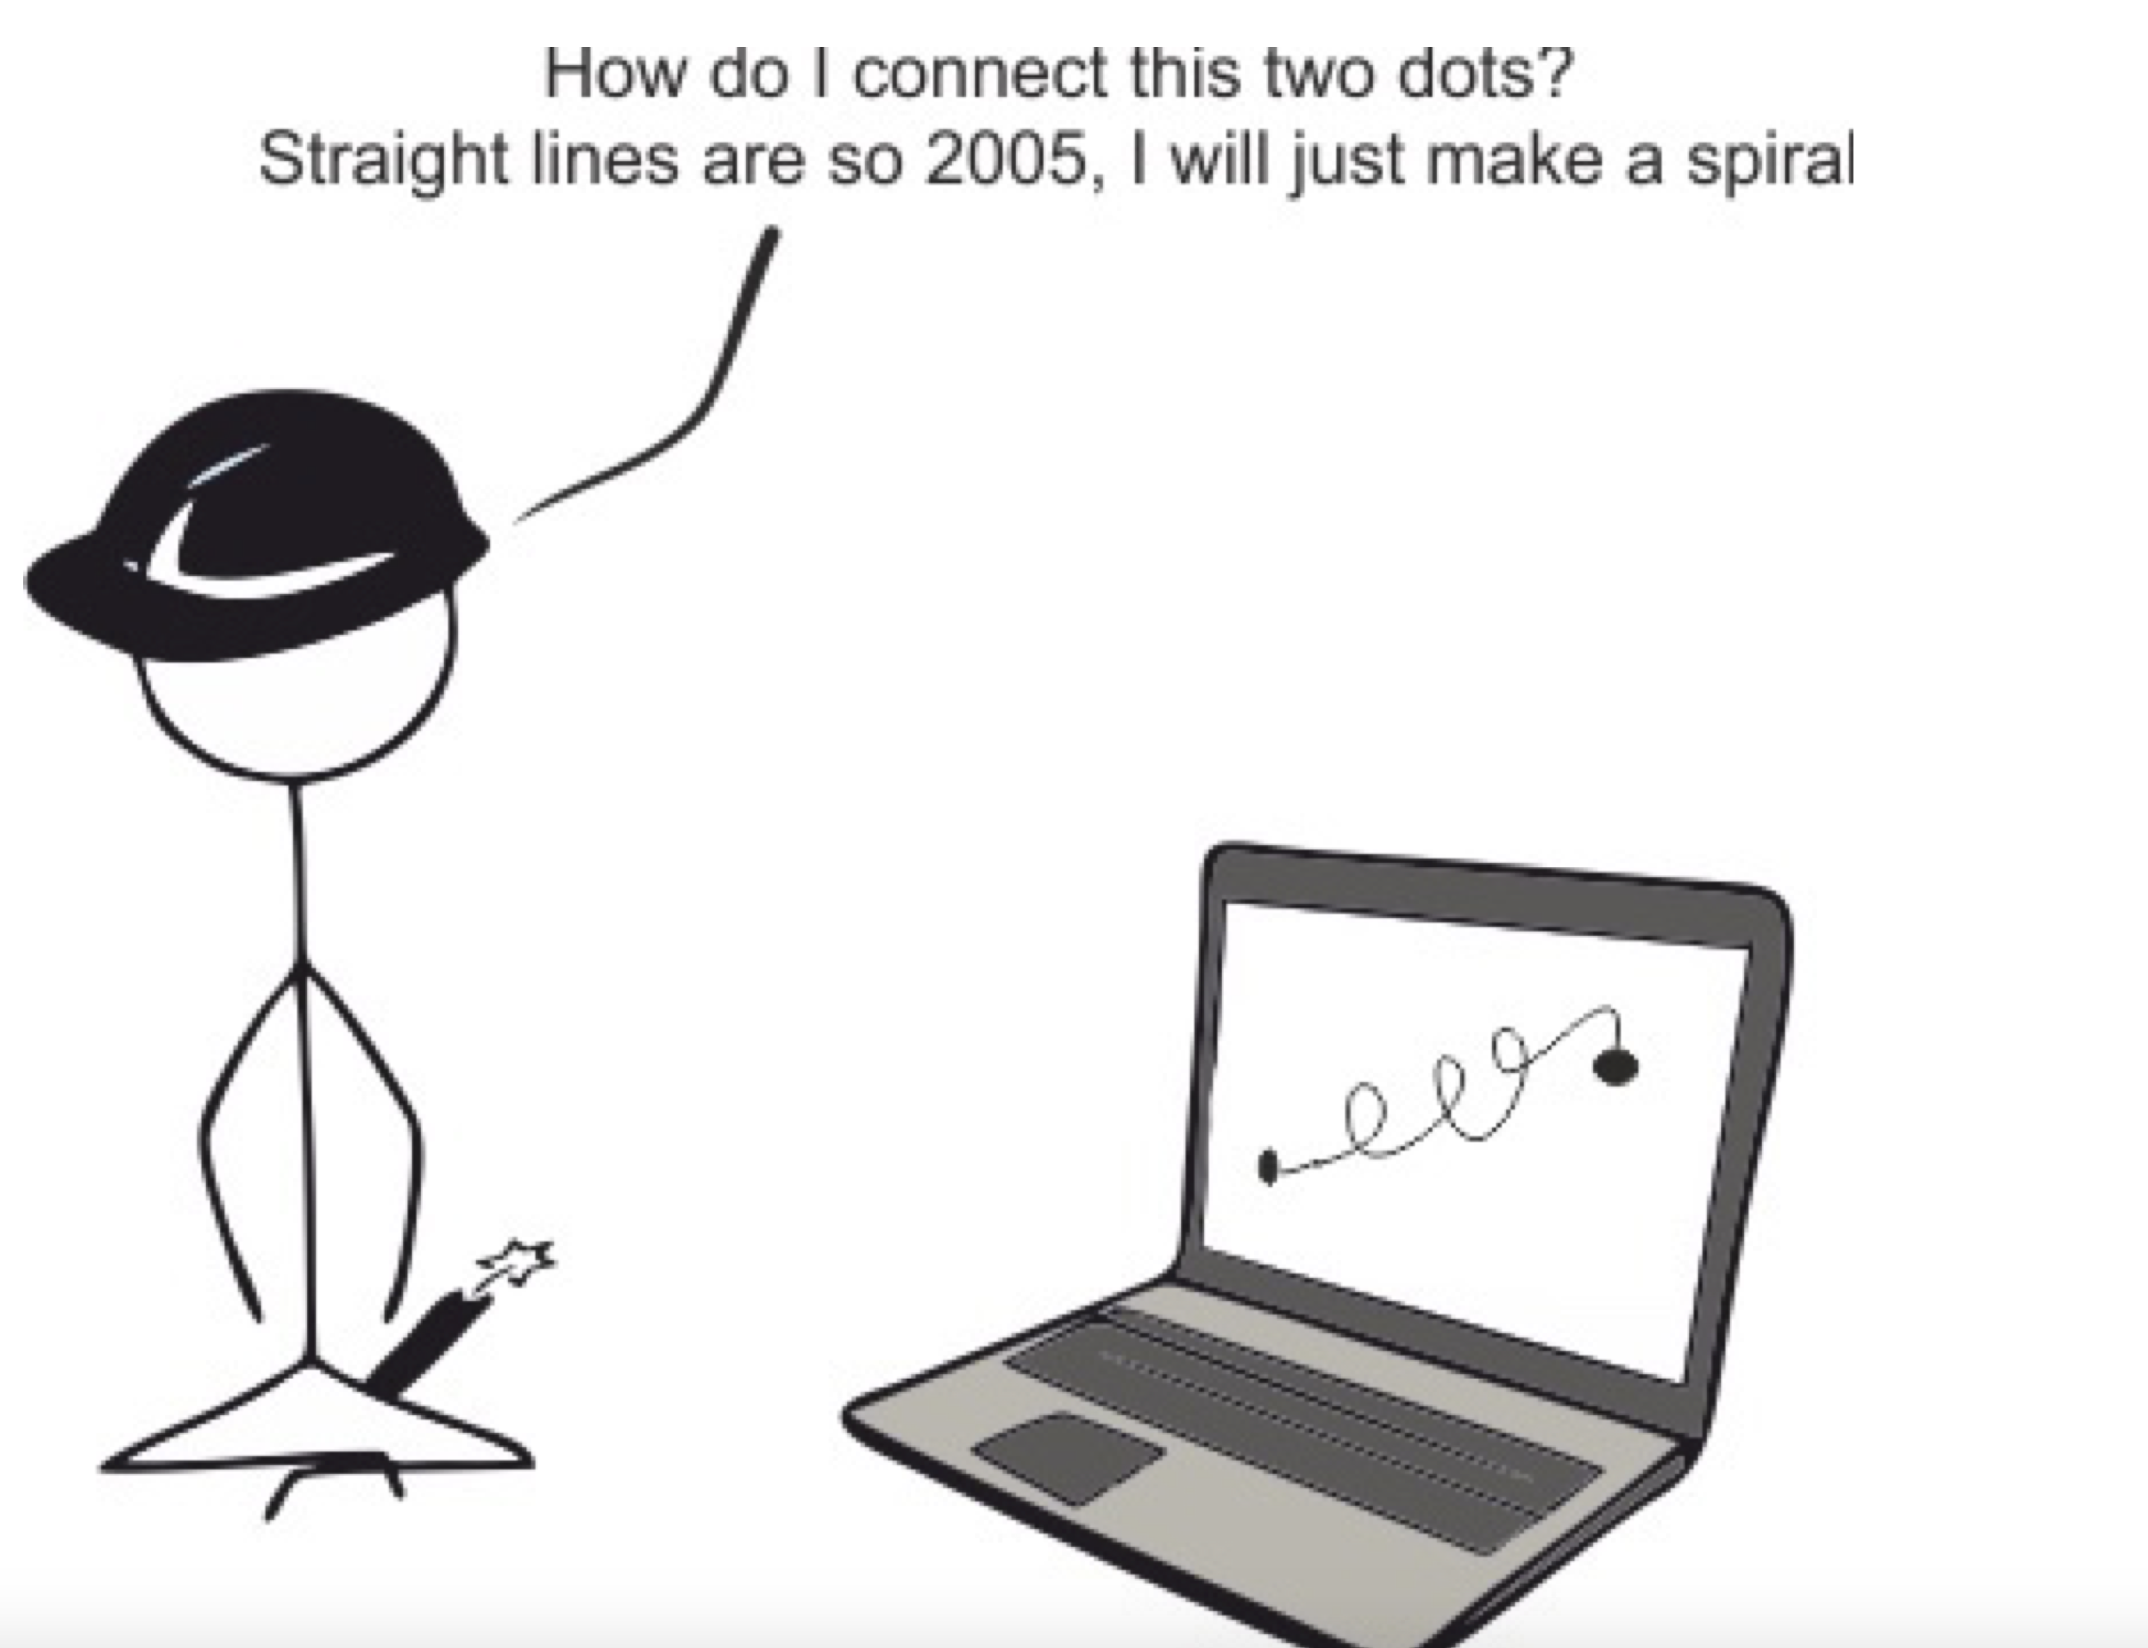

In [2]:
n = 5
x = np.random.randint(0, 15, n)
x_0 = np.linspace(0.1, 14.9, 200)

y = np.random.randint(50, 80, n)

f_x = np.random.randint(30, 60, n)
x

array([ 8, 12, 12, 13,  5])

/anaconda3/envs/gempy/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


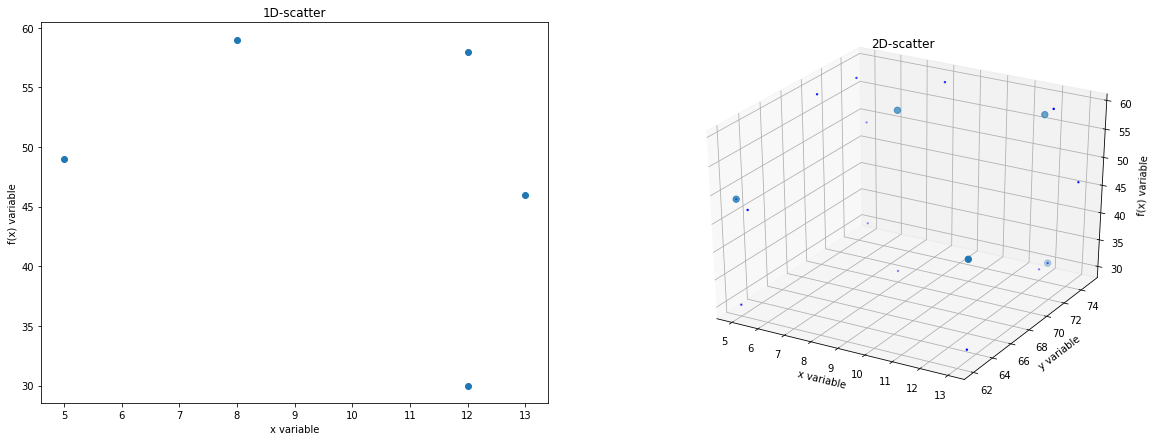

In [3]:
def plot_ploints(x, f_x, x_0=None, f_x0=None, y= None):
    fig = plt.figure(figsize=(20,7))
    
    if y is None:
        ax1= fig.add_subplot(111)
    else:
        ax1 = fig.add_subplot(121)
    
    ax1.plot(x, f_x, 'o')
    if x_0 is not None:
        if f_x0 is None:
            f_x0 = np.ones_like(x_0) * f_x.min()
        ax1.plot(x_0, f_x0, 'x', color='red')
    ax1.set_xlabel('x variable')
    ax1.set_ylabel('f(x) variable')
    ax1.set_title('1D-scatter')
    
    if y is not None:
        #fig = plt.figure()

        ax2 = fig.add_subplot(122, projection='3d')
        ax2.scatter(x, y, f_x, s =40)
        ax2.scatter(x, y.max(), f_x, s=2, color='b')
        ax2.scatter(x.min(), y, f_x,  s=2, color='b')
        ax2.scatter(x, y, f_x.min(),  s=2, color='b')


        ax2.set_xlabel('x variable')
        ax2.set_ylabel('y variable')
        ax2.set_zlabel('f(x) variable')

        ax2.set_title('2D-scatter')
        fig.show()

plot_ploints(x, f_x, y=y)

How much do we trust the data?
as
- interpolation:  we match exactly the data
- regression: If we have a expected model beaviour
- statistics
- physics


1) Interpolation
- Data driven
- High quality of data / domain complex

2) Regression
- is Based of a mathematical function
- low quality of data, assume that system can be described by a mathematical function

General equation for spatial correlation

$$f(x) = \sum^n_{i=1}w_if(x_i)$$

where $f(x_i)$ is the observed value (or attribute) at a location $x_i$, and $w_i$ are the weights that are assigned to each point.

####  Inverse distance weighting

$$w_i = \frac{1}{d_i^p \sum^n_{i=1} 1/d_i^p}$$

with d: $x_2 - x_1$

In [4]:
import scipy.interpolate

# Function to do regression
def interp_1d(new_points, given_points, given_values, kind):
    """
    new points = list of new points
    given_points = list of x positions of given points
    given_values = list of values of given points
    kind = "linear", "nearest", "cubic" (cubic needs at least 4 points)
    """
   
    f1 = scipy.interpolate.interp1d(given_points, given_values, kind=kind)
    return f1(new_points)

def plot_this_int(kind_n):

    # Type of interpolation
    kind = ["linear", "nearest", "cubic"]
    # x points where you want 
    x.sort()
    print(x)
    masked_x_0 = x_0[np.bitwise_and(x_0 > x.min(),  x_0<x.max())]
    
    new_x = masked_x_0 #np.linspace(np.min(x_pos),np.max(x_pos),60)
    new_y = interp_1d(new_x,x, f_x, kind[kind_n])
    # We want to estimate the value here:
    
    #plt.plot(x,por,'o')
    plot_ploints(x, f_x)
    plt.plot(new_x,new_y)

    #plt.xlim(0,np.max(x_pos)+1)
    #plt.ylim(0.1,0.3)
    plt.title("Basic Interpolations: " + kind[kind_n])
    #plt.xlabel("x")
    #plt.ylabel("Porosity")
   # plt.axhline(f_x.mean(), color = 'k')
    plt.tight_layout()

In [5]:
interact(plot_this_int, kind_n = (0,2,1));    


interactive(children=(IntSlider(value=1, description='kind_n', max=2), Output()), _dom_classes=('widget-intera…

#### Lagrange polynomial:

$f(x)=a_{0}+a_{1} x+a_{2} x^{2}+\cdots+a_{n} x^{n}$

\begin{aligned} \frac{f\left(x_{\alpha}\right)-f\left(x_{0}\right)}{x_{\alpha}-x_{0}} &=\frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}} \\ f\left(x_{\alpha}\right) &=f\left(x_{0}\right)+\underbrace{\frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}}}_{\text { gradient }}\left(x_{\alpha}-x_{0}\right) \end{aligned}

$f_{n}(x)=\sum_{i=1}^{n} L_{i}(x) f\left(x_{i}\right)$

where:

$L_{i}(x)=\prod_{j=0, j \neq i}^{n} \frac{\left(x-x_{j}\right)}{\left(x_{i}-x_{j}\right)}$

In [6]:
def polyfit(x, fx, x_strich,order):
    poly = 0.0
    for i in range(0, order+1):
        L = 1
        for j in range(0, order +1):
            if i != j:
                L *= ((x_strich-x[j])/(x[i]-x[j]))
        poly += fx[i]*L
    return poly


def polyfit_test(order):
    x = np.arange(1, order+2, 1)
    y = np.random.randint(1, 10, size = len(x))
    #y = f_x
    
    #print('x =', x,'y =', y)
    x_strich =  np.arange(1,order+1.1,0.1)
    x = np.array(x)
    fx = np.array(y)
#     poly = 0.0
#     for i in range(0, order+1):
#         L = 1
#         for j in range(0, order +1):
#             if i != j:
#                 L *= ((x_strich-x[j])/(x[i]-x[j]))
#         poly += fx[i]*L
    
    fit2 = polyfit(x, fx, x_strich, order)
    plt.plot(x_strich, fit2, 'b', label='%s. order' %order)
    plt.plot(x,y,'xr')
    plt.legend()
    plt.show()
    
    #return poly


In [7]:
interact(polyfit_test, order=(1,15))

interactive(children=(IntSlider(value=8, description='order', max=15, min=1), Output()), _dom_classes=('widget…

<function __main__.polyfit_test(order)>

## Statistics


Mean equations:

$$\overline{z}=\frac{1}{\sum_{k} w_{k}} \sum z_{k} w_{k}$$

$$p\left(z_{k}\right)=\frac{w_{k}}{\sum_{k} w_{k}}$$

$$
\overline{z}=\sum_{\alpha} z_{\alpha} p\left(z_{\alpha}\right)=m^{\star}
$$

Standard deviation

$$
s^{2 \prime}=\frac{1}{n-1} \sum_{\alpha}\left(z_{\alpha}^{\star}-m^{\star}\right)^{2}
$$

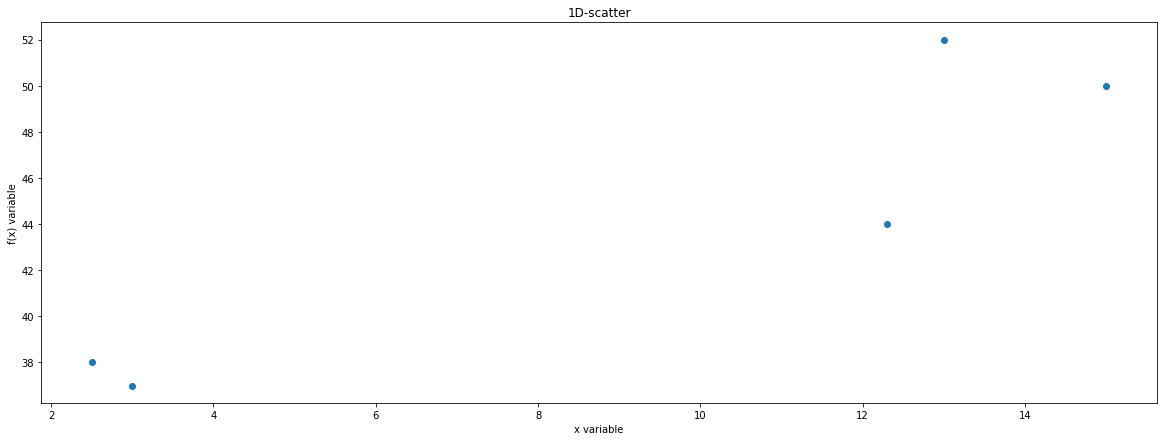

In [8]:
x = np.array([2.5, 3, 12.3, 13, 15])
f_x = np.array([38, 37, 44, 52, 50])
plot_ploints(x, f_x)

In [31]:
def plot_stats(x = np.array([2.5, 3, 12.3, 13, 15]),
               f_x = np.array([38, 37, 44, 52, 50]),
               plot_mean=True, plot_std=True, plot_norm=True):
    
    
    plot_ploints(x, f_x)
    if plot_mean is True:
        # plot the mean
        plt.plot(x_0, np.ones_like(x_0)*f_x.mean(), "b-", linewidth = 2,
         color = "black", label = "Mean position")
        print('Mean: ', f_x.mean())
    if plot_std is True:
        # plot the standar deviation
        plt.fill_between(x_0, f_x.mean()+f_x.std()*1.9600,
                 f_x.mean()-f_x.std()*1.9600,  alpha=.2, 
                 color='r', label='95% Confidence Interval')
        print ('Standard deviation: ', f_x.std())
    if plot_norm is True:
        mu = f_x.mean()
        variance = f_x.var()
        sigma = np.sqrt(variance)
        # x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        y = np.linspace( f_x.mean()+f_x.std()*3,
                         f_x.mean()-f_x.std()*3, 100)
        plt.plot( 16 + 60* stats.norm.pdf(y, mu, sigma), y)
    
    pad = (f_x.max() - f_x.min()) *1
    plt.ylim(f_x.min()-pad, f_x.max()+pad)

In [33]:
interact(plot_stats, plot_mean=False, plot_std=False, plot_norm=False,
         x = fixed(np.array([2.5, 3, 12.3, 13, 15])),
         f_x = fixed(np.array([38, 37, 44, 52, 65]))
        )

interactive(children=(IntSlider(value=1, description='decimate', max=4, min=1), Checkbox(value=False, descript…

<function __main__.plot_stats(x=array([ 2.5,  3. , 12.3, 13. , 15. ]), f_x=array([38, 37, 44, 52, 50]), decimate=1, plot_mean=True, plot_std=True, plot_norm=True)>

## Task:

1) By modifing x and f_x:
       - Create a first order stationary data set
       - Creaate a second order stationary

2) Create a data set which first order (mean) increase as 

## What is the distance to the point we want to simulate?


![foo](http://nre-aachen.github.io/projects/Kriging_for_dummies/krig1.png "foo")
![foo](http://nre-aachen.github.io/projects/Kriging_for_dummies/krig2.png "foo")

In [11]:
# calculation of spherical covariance given just the position of the known points x! You can use verbose = 1 to see the 
# intermediate steps
def cov_spherical(x,r, C_o = 1, verbose = 0):  
    
    """x = Array: Position of the measured points"
    r =  Range of the spherical semivariogram
    C_o = Nugget, variance
    """
    
    # Createing the lag vector
    i, j = np.indices((len(x),len(x)))
    h = np.zeros((len(x),len(x)))
    for l in range(len(x)):
        h[i==l] = abs(x[l]-x)
        
    # Initializing
    C_h = np.ones_like(h)
    
    # Appliying the function
    C_h = (h<r)*( C_o*(1-1.5*(h/r)+0.5*(h/r)**3))
    if verbose !=0:
        print ("Our lag matrix is")
        print (h)
        print( "Our covariance matrix is")
        print (C_h)
            
    return C_h

In [12]:
cov_spherical(np.array([1.,4,5]), r=4.5)

array([[1.        , 0.14814815, 0.01783265],
       [0.14814815, 1.        , 0.67215364],
       [0.01783265, 0.67215364, 1.        ]])

In [13]:
def plot_this(Range):
    x = np.arange(0,10,.2)
    #X, Y = np.meshgrid(x,x)
    #plt.subplot(111)
    #plt.contourf(X,Y,cov_spherical(x,4.5), cmap =  u"Reds")
    plt.xlabel("x position")
    plt.ylabel("Kind of the weight of the studied point")
    plt.title("Covariance plot")


    #plt.subplot(122)
    plt.plot(x, cov_spherical(x,Range)[0,:])
    plt.tight_layout()


In [14]:
interact(plot_this, Range = (1,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='Range', max=10.0, min=1.0), Output()), _dom_classes=…

![](http://www.harrisgeospatial.com/docs/html/images/kriging_equations.png)

In [15]:
def kriging(x_vector = np.array([10, 15, 45]), y_vector = np.array([.08,.11,.18]),
            x_0 = np.array([[12, 15, 55]]), C_o = None, range_ = 20, nugget= .0001):
    # Parameters
    mean_y = y_vector.mean()
    var_y = y_vector.var()
    y_res = y_vector - mean_y
    x_0b = np.atleast_2d(x_0)
    x_0_domain = np.linspace(0, 60, 2000)
    
    if True:
        x_0 = np.atleast_2d(x_0_domain)
    if C_o is None:
        C_o = var_y
    r = range_

    x_1 = x_vector
    x_2 = x_vector

    # Functions
    def distance(v1, v2):
        return np.sqrt((v1 - v2.reshape(-1, 1))**2)
    def cov_sph(h, r, c_0, nugget = None):
        cov = (h<r)*( C_o*(1-1.5*(h/r)+0.5*(h/r)**3))
        if nugget is not None:
            cov = cov + np.eye(h.shape[0]) * nugget
        return cov

    # Distance matrices
    h = distance(x_1, x_2)
    h_0 = distance(x_1, x_0)
    h_0b = distance(x_1, x_0b)

    # Covariance matrices
    C_h = cov_sph(h, r, C_o, nugget)
    b = cov_sph(h_0, r, C_o, None)
    bb = cov_sph(h_0b, r, C_o, None)
    C_h_plot = cov_sph(np.atleast_2d(x_0_domain), r, C_o, nugget)

    weights = np.linalg.solve(C_h, b.T)
    kriging_res = np.sum(weights * y_res.reshape(-1, 1), axis=0)
    kriging_mean =  kriging_res + mean_y
    kriging_var = C_o - np.diag(np.dot(b, weights))
    
    weightsb = np.linalg.solve(C_h, bb.T)
    kriging_meanb = np.sum(weightsb * y_res.reshape(-1, 1), axis=0) + mean_y
    
    fig = plt.figure(figsize(20,13))
   

    fig.add_subplot(111, alpha=.6)

    plt.plot(x_0[0], kriging_mean, "b-", linewidth = 2,
         color = "black", label = "Mean position")

    plt.fill_between(x_0[0], kriging_mean+np.sqrt(kriging_var)*1.9600,
                 kriging_mean-np.sqrt(kriging_var)*1.9600,  alpha=.2, 
                 color='r', label='95% Confidence Interval')
    
    plt.fill_between(x_0[0], kriging_mean+np.sqrt(kriging_var),
             kriging_mean-np.sqrt(kriging_var),  alpha=.6, 
             color='r')

    
    plt.plot(x_vector, y_vector,'b.', markersize=10, label=u'Observations')
    plt.plot(x_0b[0], kriging_meanb, 'x', color= 'green', markersize=20, label=u'Interpolated_points')

    #plt.errorbar(x_vector, y_vector, 0.005, fmt = "none", color = "red")
    plt.xlim(0, 25)
    
    fig.add_subplot(339)
    plt.plot(x_0_domain, C_h_plot[0])
    
    plt.title("Ordinary Kriging Example")
    plt.xlabel("Position")
    plt.ylabel("Value")
    plt.grid()
    plt.legend(loc = 0)

In [16]:
x

array([ 2.5,  3. , 12.3, 13. , 15. ])

In [17]:
x_v1 = np.array([10, 15, 45])
y_v1 = np.array([.08,.11,.18])
x_v2 = np.random.uniform(0,45,7)
y_v2 = np.random.normal(0.15,0.03,7)

No handles with labels found to put in legend.


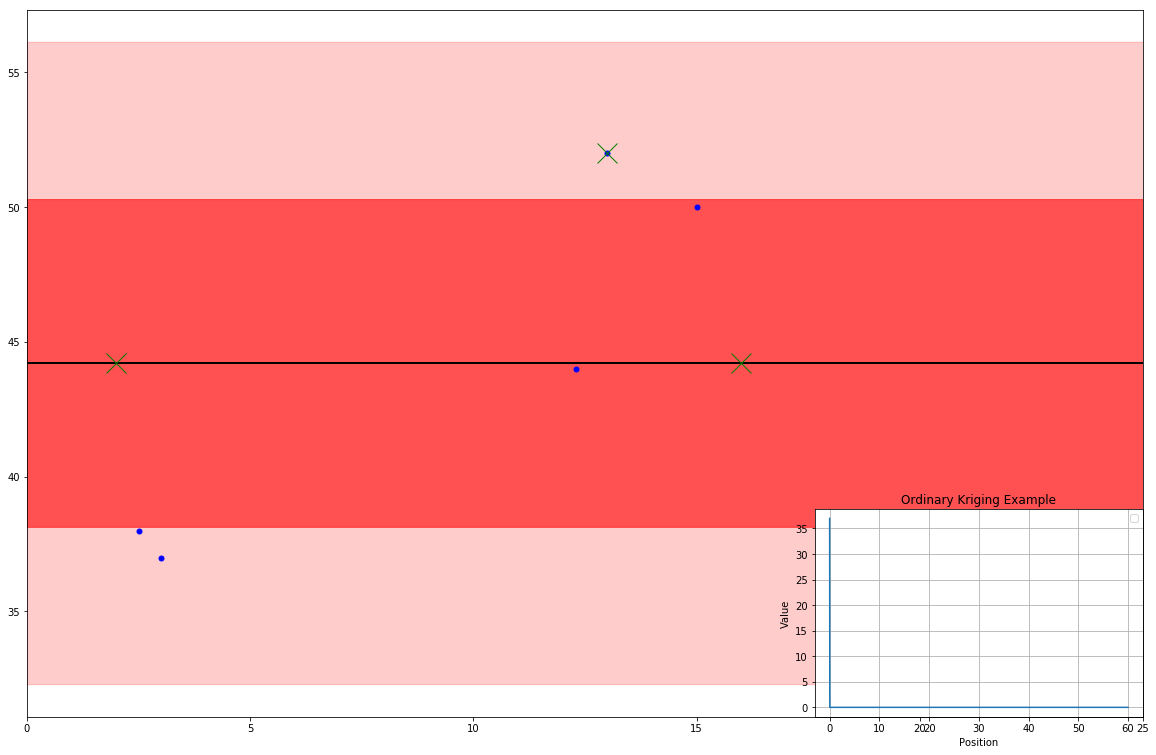

In [18]:
kriging(x_vector = x, y_vector = f_x,
        x_0 = np.array([[2, 16, 13]]), C_o=None, range_ = .000001, nugget= 0.000005)